In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
plt.style.use('seaborn-bright')
from scipy.constants import c, h, e

In [2]:
def convert_energy(path, energy, new_energy, save_data = True, plot = True, save_graph = False, title = 'Sample'):
    """ Converts a diffractogram energy.
    Args:
        path: string of the data's path
        energy: energy of measurement
        new_energy: desired energy of converted diffractogram
        
        save_data: if True, saves the converted data as new file in the same place; default = True
        plot: if True, plots the converted diffractogram; default = True
        save_graph: if True, saves png of the converted diffractogram; default = False
        title: sample name for the graph
    """
    data = pd.read_csv(path, sep = '\t')
    twotheta = np.array(data['2theta'])
    intensity = data['Unnamed: 1']
    
    WL = h*c*10**(10)/(energy*e)
    Q = 4*np.pi*np.sin(twotheta*np.pi/(2*180))/WL
    new_WL = h*c*10**(10)/(new_energy*e)
    new_twotheta = 2*180*np.arcsin(Q*new_WL/(4*np.pi))/np.pi
    
    if plot == True:
        fig, ax = plt.subplots(1,1)
        ax.plot(new_twotheta, intensity, c = 'r', linewidth = 0.4)
        ax.set_xlabel(r'$2\theta$')
        ax.set_ylabel('Intensidade')
        ax.grid('--')
        if title != False:
            ax.set_title(title + f' converted to {new_energy} keV')  
            
    if save_data == True:
        new_path = path.replace('.txt', f'_converted_to_{new_energy}.txt')
        new_data = pd.DataFrame(data = {'2theta' : list(new_twotheta), 'Intensity' : intensity})
        new_data.to_csv(new_path, sep = '\t', index=False)
        
    if save_graph == True:
        plt.savefig(new_path.replace('.txt', '.png'), dpi = 200)
    return new_twotheta, intensity

In [3]:
PATH = r'dados_bruto/EUC_1_Amostra1_scan10_50_12_33h_pre-processed_merge.txt'

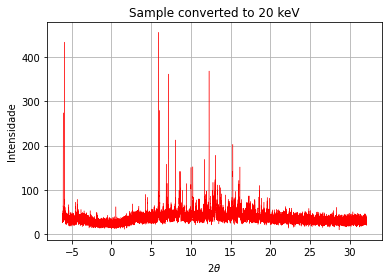

In [4]:
x, y = convert_energy(PATH, 16.1, 20, save_data = True, plot = True, save_graph = False, title = 'Sample')
x = np.array(x[12764:])
y = np.array(y[12764:])/max(y[12764:])

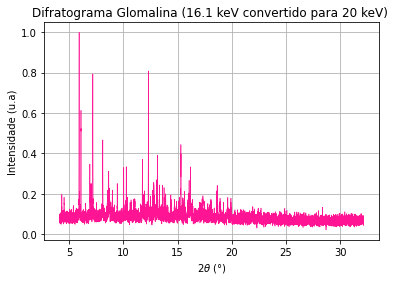

In [5]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y, c = 'deeppink', linewidth = 0.6)
ax.set_xlabel(r'$2\theta$ (°)')
ax.set_ylabel('Intensidade (u.a)')
ax.grid('--')
ax.set_title('Difratograma Glomalina (16.1 keV convertido para 20 keV) ')
plt.savefig(r'graficos/difratograma_glomalina.png', dpi = 200)

In [6]:
dados = pd.read_csv(r'dados_bruto/flyscan_MAC_heitor_glomanina_56_hr_20kev_02-06-2023_15-07-21_merge.txt', sep = '\t')

In [7]:
x1 = dados['2theta'][0:28083]
y1 = np.array(dados['Unnamed: 1'][0:28083])
y1 = y1/max(y1)

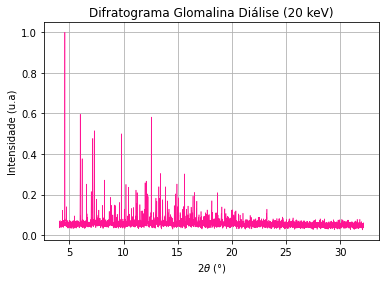

In [8]:
fig, ax = plt.subplots(1,1)
ax.plot(x1,y1, c = 'deeppink', linewidth = 0.6)
ax.set_xlabel(r'$2\theta$ (°)')
ax.set_ylabel('Intensidade (u.a)')
ax.grid('--')
ax.set_title('Difratograma Glomalina Diálise (20 keV)')
#ax.set_xlim(6,26)
plt.savefig(r'graficos/difratograma_glomalina.png', dpi = 200)

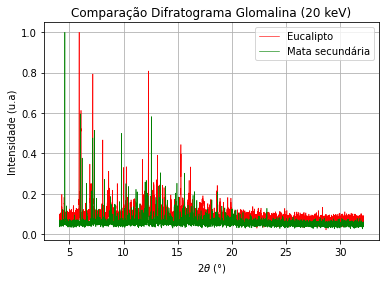

In [9]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y, c = 'r', linewidth = 0.6, label = 'Eucalipto')
ax.plot(x1,y1, c = 'g', linewidth = 0.6, label = 'Mata secundária')
ax.set_xlabel(r'$2\theta$ (°)')
ax.set_ylabel('Intensidade (u.a)')
ax.grid('--')
ax.set_title('Comparação Difratograma Glomalina (20 keV)')
ax.legend()
plt.savefig(r'graficos/comparacao_glomalina.png', dpi = 200)